#                     Customer Churn Prediction Using Artificial Neural Network (ANN)


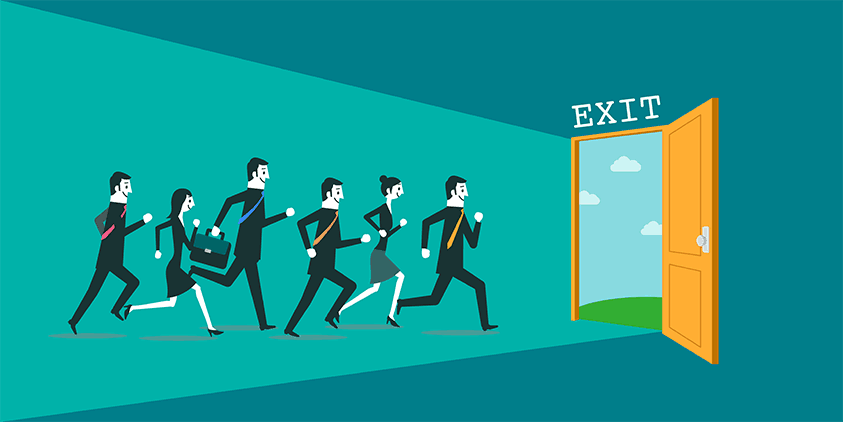

Customer churn prediction is to measure why customers are leaving a business. In this we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model!

In [187]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [188]:
df  = pd.read_csv("Telco-Customer-Churn.csv")

In [189]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6268,9746-UGFAC,Female,0,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.85,450.65,No
6655,1705-GUHPV,Female,0,No,No,63,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.20,1618.2,No
6049,7634-HLQJR,Female,0,Yes,Yes,47,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.05,1016.7,No
3927,4390-KYULV,Male,0,Yes,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.55,51.15,Yes
4037,0603-TPMIB,Female,0,Yes,Yes,59,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.45,1534.05,No


##### At frst we wll delete the column costomerID as it is of no use for predicton

In [190]:
df.drop("customerID",axis= 1,inplace=True)

In [191]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##### Quick glance at above makes me realize that TotalCharges should be float but it is an object. lets change it to float

In [192]:
df.TotalCharges.values        

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [193]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

###### Looks like we have some empty space in data so lets check for that and deal with that

In [194]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


###### these many entries are blank in 'totalcharges',i.e 11

In [195]:
df.shape

(7043, 20)

In [196]:
df[df.TotalCharges!=' '].shape

(7032, 20)

###### Now lets remove the entries with space  in TotalCharges

In [197]:
df1 = df[df.TotalCharges!=' ']

In [198]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1152,Male,0,No,No,7,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Mailed check,54.85,370.4,No
2600,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,70.10,70.1,No
4571,Female,0,Yes,No,20,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.80,1540.35,No
4605,Male,0,Yes,No,63,Yes,Yes,DSL,No,Yes,No,Yes,No,Yes,Two year,No,Mailed check,67.25,4234.15,No
902,Male,0,No,No,17,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,93.85,1625.65,Yes


In [199]:
df1["TotalCharges"]= pd.to_numeric(df1['TotalCharges'])

<ipython-input-199-1341e67704f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["TotalCharges"]= pd.to_numeric(df1['TotalCharges'])


In [200]:
df1.TotalCharges.values.dtype

dtype('float64')

In [201]:
df1[df1.Churn=="No"]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


## Data visualization

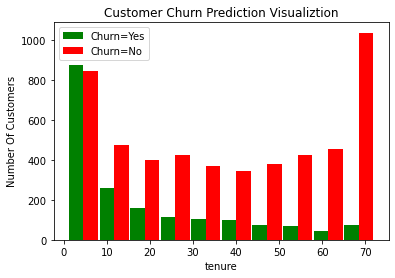

In [202]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

#### customer churn:- is the rate at which customers stop doing business with an entity
Here we notce that customers havng tenure of 70 and above are not leaving means they are valuable customers and the customers have less than 10 or 5 of tenure are likely to be churn 

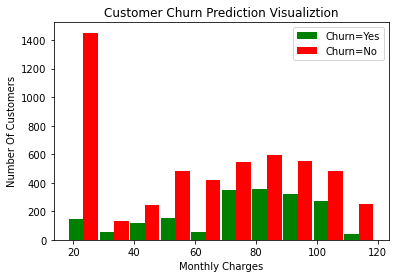

In [203]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

##### Many of the columns in dataset are yes, no etc. Let's print unique values in object columns to see data values



In [204]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [205]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


##### in dataset we observe that Some of the columns have no internet service or no phone service, that can be replaced with a simple No



In [206]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

C:\Users\ADMIN\anaconda3\anaconda2\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [207]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


##### convert Yes and No to 1 and 0

In [208]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\ADMIN\anaconda3\anaconda2\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [209]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [210]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [211]:
df1["gender"] .unique()

array([1, 0], dtype=int64)

#### One hot encoding to categorical columns 

In [212]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [213]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2249,1,0,0,0,11,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2695,0,0,1,0,52,1,1,1,1,1,...,1,0,0,0,1,0,0,1,0,0
2948,0,1,1,0,41,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4920,1,0,1,1,71,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1853,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [214]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

###### For any Neural network before training the data , data should be standardised,

In [215]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [216]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

###### Now we wll split the data into train and test

In [217]:
X = df2.drop('Churn',axis=1)
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [218]:
X_train.shape

(5625, 26)

In [219]:
X_test.shape

(1407, 26)

In [220]:
y_train.shape

(5625,)

In [221]:
y_test.shape

(1407,)

### Build the ANN model n keras/Tensorflow

In [222]:
import tensorflow as tf
from tensorflow import keras
import keras.models as km
from keras.models import Sequential
from keras.layers import Dense


## Now we have our standard data ,it's time to build the model using keras beofre that we have to define 
#1. The model type 

#2. Define the network architecture

#3. complie the model and fit the model  (i.e Complie defines the loss function,the optimizers,the metrics)

#4. Predict the result

#5. Evaluate the model

In [223]:
model = Sequential()

In [224]:
model.add(Dense(units = 26,  activation = 'relu', input_dim =26))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [225]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4660 - accuracy: 0.7787
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.8021
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.8044
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8037
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4131 - accuracy: 0.8059
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4096 - accuracy: 0.8050
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4092 - accuracy: 0.8078
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4070 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4073 - accuracy: 0.8068
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4053 - accura

In [226]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7747


[0.48955821990966797, 0.7746979594230652]

In [227]:
yp = model.predict(X_test)
yp[:5]

array([[0.07272658],
       [0.57063085],
       [0.00369221],
       [0.80445075],
       [0.28283286]], dtype=float32)

In [228]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [229]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [230]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [231]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.64      0.52      0.57       408

    accuracy                           0.77      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.77      0.77      1407



Text(69.0, 0.5, 'Truth')

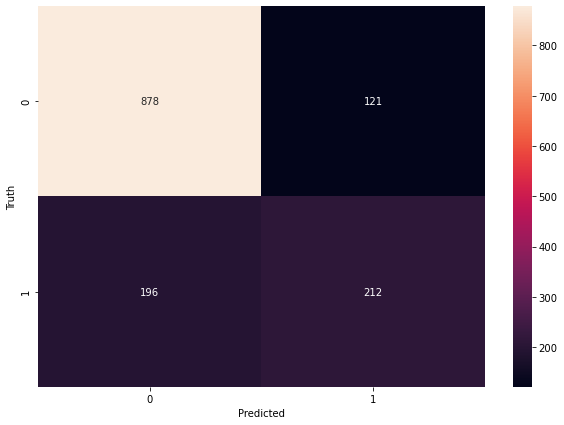

In [232]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [234]:
y_test.shape

(1407,)

#### Accuracy

In [238]:
round((878+212)/(878+121+196+212),2)

0.77

##### Precision for 0 class. i.e. Precision for customers who did not churn



In [240]:
#precision = (No of correctly predicted zeros/(total no.of zeros))
round(878/(878+196),2)

0.82

##### Precision for 1 class. i.e. Precision for customers who actually churned



In [241]:
#precision = (No of correctly predicted one's/(total no.of one's))
round(212/(212+121),2)

0.64

#### Recall for 0 class


In [242]:
round(878/(878+121),2)

0.88

##### Recall for 1 class


In [243]:
round(212/(212+196),2)

0.52

In [246]:
model.save('Telcom_churn1.h5')

In [245]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 26)                702       
                                                                 
 dense_8 (Dense)             (None, 15)                405       
                                                                 
 dense_9 (Dense)             (None, 10)                160       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,278
Trainable params: 1,278
Non-trainable params: 0
_________________________________________________________________
